# **AAPG WEEK 5**

**PROJECT 1 : WATER QUALITY ANALYSIS**

13th July 2024

**Facilitators:**
1. Giles Twiss
2. Promise Ekeh




# Data Description and Task Overview

## Data Description

This dataset contains measurements of various water quality parameters collected from different water sources over time. Below is a detailed description of each column in the dataset:

1. **Index**: Unique identifier for each data entry.
2. **pH**: The pH level of the water, indicating its acidity or alkalinity.
3. **Iron**: Concentration of iron in the water (in mg/L).
4. **Nitrate**: Concentration of nitrate in the water (in mg/L).
5. **Chloride**: Concentration of chloride in the water (in mg/L).
6. **Lead**: Concentration of lead in the water (in mg/L).
7. **Zinc**: Concentration of zinc in the water (in mg/L).
8. **Color**: The color of the water sample (e.g., Colorless, Faint Yellow).
9. **Turbidity**: The cloudiness or haziness of the water, measured in Nephelometric Turbidity Units (NTU).
10. **Fluoride**: Concentration of fluoride in the water (in mg/L).
11. **Copper**: Concentration of copper in the water (in mg/L).
12. **Odor**: Descriptive term for the odor of the water (e.g., odorless, faint odor).
13. **Sulfate**: Concentration of sulfate in the water (in mg/L).
14. **Conductivity**: The ability of the water to conduct electricity, measured in microsiemens per centimeter (µS/cm).
15. **Chlorine**: Concentration of chlorine in the water (in mg/L).
16. **Manganese**: Concentration of manganese in the water (in mg/L).
17. **Total Dissolved Solids (TDS)**: Total concentration of dissolved substances in the water (in mg/L).
18. **Source**: Source of the water sample (e.g., Lake, River, Ground).
19. **Water Temperature**: Temperature of the water at the time of measurement (in °C).
20. **Air Temperature**: Temperature of the air at the time of measurement (in °C).
21. **Month**: Month when the sample was taken.
22. **Day**: Day of the month when the sample was taken.
23. **Time of Day**: Time of day when the sample was taken (e.g., 0 for midnight, 12 for noon).
24. **Target**: Binary target variable indicating whether the water quality meets a certain standard (0 for meets standard, 1 for does not meet standard).


## Task for Participants

Participants are tasked with analyzing the water quality data to determine patterns, correlations, and insights that can help in understanding and managing water quality. Specific tasks include:

1. **Data Cleaning and Preprocessing**:
    - Handle missing or inconsistent data.
    - Convert categorical data into numerical format if necessary.
    - Normalize or standardize numerical features.

2. **Exploratory Data Analysis (EDA)**:
    - Generate summary statistics for each feature.
    - Visualize data distributions and relationships between variables using plots (e.g., histograms, scatter plots, box plots).
    - Identify any trends or anomalies in the data.

3. **Feature Engineering**:
    - Create new features that might be useful for prediction, such as interaction terms or aggregates.
    - Evaluate the importance of different features for predicting water quality.

4. **Model Building**:
    - Split the data into training and testing sets.
    - Train machine learning models to predict the target variable (water quality standard).
    - Evaluate model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

5. **Model Interpretation and Insights**:
    - Interpret the model to understand which factors most influence water quality.
    - Provide actionable insights based on model findings.
    - Discuss potential interventions or policy recommendations to improve water quality.

# **Data Access**

Download the `water_quality_dataset_100k.csv` dataset from the google drive

https://drive.google.com/drive/folders/1k89P3amXikq3Fd_40GUVKjUav1YO6Zyl

## **Import Neccessary Libraries**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **Read Data**
![](image/data_snapshot.png)

In [95]:
# Convert original data to float before uploading
# Can be done wither in excel or in pandas
# Read in the data with read_csv() into a Pandas Dataframe
WQA = '/content/water_quality_dataset_100k_WC.xlsx'
Client_data = pd.read_excel(WQA)
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
Client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      98096 non-null   float64
 1   Iron                    99342 non-null   float64
 2   Nitrate                 98242 non-null   float64
 3   Chloride                97054 non-null   float64
 4   Lead                    99553 non-null   float64
 5   Zinc                    97387 non-null   float64
 6   Color                   99910 non-null   object 
 7   Turbidity               99186 non-null   float64
 8   Fluoride                96750 non-null   float64
 9   Copper                  96662 non-null   float64
 10  Odor                    97015 non-null   float64
 11  Sulfate                 96635 non-null   float64
 12  Conductivity            97267 non-null   float64
 13  Chlorine                99057 non-null   float64
 14  Manganese           

In [96]:
# Use .shape to understand how many observations (ie rows/records) of the dataset
# (row count, column count)
Client_data.shape

(100001, 22)

In [101]:
# Using .head() function to view the first few observations (i.e. rows/records) of the dataset
Client_data.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Day,Month,Time of Day
0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,29,January,4
1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,26,November,16
2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,31,January,8
3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,NaN,147.163233,237.028468,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,1,April,21
4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,29,June,7


In [102]:
# Using .tail() function to view the last few observations (i.e. records) of the dataset
Client_data.tail()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Day,Month,Time of Day
99996,8.818809,0.000075,5.491966,NaN,1.020000e-16,0.054606,Light Yellow,0.618404,1.517286,0.023284,2.063411,62.932829,464.337256,2.479101,0.006608,441.819671,River,20.007815,69.299508,8,August,22
99997,7.277367,0.000022,2.878326,126.880370,1.970000e-22,3.632629,Colorless,0.291402,0.228949,0.337176,1.667669,105.455532,561.348259,3.315341,0.001116,308.963907,Aquifer,6.787200,70.198798,27,January,14
99998,7.000954,0.012017,4.157934,165.559327,5.500000e-126,2.162606,Faint Yellow,0.055013,0.275803,0.077683,2.530555,125.556489,453.531463,3.457473,0.010697,236.960240,Lake,12.707579,46.856938,17,December,1
99999,8.374296,0.134012,2.631553,148.166082,3.850000e-40,0.251668,Colorless,0.406297,0.458973,NaN,1.042708,107.051631,554.654096,2.603017,0.000242,405.005236,Lake,20.841677,55.109951,11,NaN,3
100000,7.154356,0.092041,5.656341,212.623606,3.100000e-72,2.462944,Colorless,0.000355,0.962474,0.386105,2.517665,80.011877,351.698003,2.907079,0.023063,409.911033,Well,4.789358,33.621950,16,January,22


In [103]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value
# 25% is the 25th percentile
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the maximum amount of the value
Client_data.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day
count,98096.000000,9.934200e+04,98242.000000,97054.000000,9.955300e+04,97387.000000,9.918600e+04,96750.000000,9.666200e+04,97015.000000,96635.000000,97267.000000,99057.000000,9.815200e+04,99976.000000,97170.000000,99467.000000,100001.000000,100001.000000
mean,7.465820,7.063514e-02,5.778242,174.085913,5.767343e-04,1.453518,3.692642e-01,0.864798,4.248778e-01,1.682217,139.499254,425.335535,3.177733,4.508899e-02,256.631253,19.205925,59.956199,-152.914081,-173.413506
std,0.702666,3.101010e-01,2.644179,55.831713,1.992903e-02,1.367163,6.234714e-01,0.672095,4.471878e-01,0.983363,58.936932,189.214918,0.648524,2.965350e-01,149.048334,11.349848,18.085812,1288.642650,1347.863032
min,2.433522,7.450000e-40,0.480498,37.418247,0.000000e+00,0.000005,8.020000e-13,0.000071,4.440000e-08,0.011008,16.164578,18.702267,1.065086,4.070000e-46,0.010643,1.558907,-14.794843,-9999.000000,-9999.000000
25%,6.976616,6.805000e-06,3.890731,135.139803,6.030000e-124,0.399269,3.212738e-02,0.358390,1.191108e-01,0.838458,96.218793,286.998201,2.720986,1.160000e-06,128.058177,11.400262,47.759298,8.000000,5.000000
50%,7.463443,1.556480e-03,5.439880,170.625235,1.650000e-63,1.049581,1.732581e-01,0.734768,3.147735e-01,1.668412,131.754309,398.504507,3.166718,3.058185e-04,255.997346,16.540677,59.908517,15.000000,11.000000
75%,7.963269,3.729389e-02,7.325300,208.530120,9.760000e-28,2.146063,5.060705e-01,1.241864,6.184055e-01,2.491432,175.883430,534.341865,3.627716,7.766188e-03,383.516805,23.942777,72.194840,23.000000,17.000000
max,12.040008,1.124382e+01,48.337580,853.229772,2.796741e+00,19.179677,1.530969e+01,9.758040,1.118297e+01,4.141944,1279.553774,1688.540980,9.491165,1.474090e+01,579.777639,159.547188,131.888212,31.000000,23.000000


# **Task 1: Data Cleaning and Preprocessing**


# Step 1: Combine "Month", "Date" and "Time of Day" into one DateTime format

  NB: Concatenation cannot work with float
  
  NB: Need to handle blanks & Float NaN values in "Day", "Month", and "Time of Day" columns either in excel, pandas or combination of both

  NB: Convert combined "DateTimeInfo" string below into an actual DateTime format.
  
  NB: Constant year of 2024 assumed

  NB: This step is needed to plot time series data later

In [104]:
# Function to convert float to hh:mm:ss format
def float_to_time_string(float_time):
    # Handle NaN values
    if pd.isna(float_time):
        return "NaN","-9999"  # Or any placeholder you prefer for missing values

    # Convert to float if it's a string
    float_time = float(float_time)

    # Calculate hours, minutes, and seconds
    hours = int(float_time)
    minutes = int((float_time - hours) * 60)
    seconds = int((((float_time - hours) * 60) - minutes) * 60)

    # Format as hh:mm:ss
    return f"{hours:02}:{minutes:02}:{seconds:02}"

In [105]:
# Step 2: Apply the function to the relevant column
# Assuming the column with float numbers is named 'Time of Day'
Client_data['Time'] = Client_data['Time of Day'].apply(float_to_time_string)
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 2000)  # Adjust the width to display the DataFrame within a reasonable width
pd.set_option('display.max_colwidth', None)  # Display full column width
print(Client_data.head(10))

         pH          Iron   Nitrate    Chloride           Lead      Zinc           Color  Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  Chlorine     Manganese  Total Dissolved Solids   Source  Water Temperature  Air Temperature  Day      Month  Time of Day      Time
0  8.332988  8.350000e-05  8.605777  122.799772   3.710000e-52  3.434827       Colorless   0.022683  0.607283  0.144599  1.626212   87.266538    471.683357  3.708178  2.270000e-15              332.118789      NaN                NaN        43.493324   29    January            4  04:00:00
1  6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94  1.245317    Faint Yellow   0.019007  0.622874  0.437835  1.686049  144.010981    432.844908  3.292038  8.020000e-07              284.641984     Lake          15.348981        71.220586   26   November           16  16:00:00
2  5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76  0.528280    Light Yellow   0.319956  0.423423  0.431588  3.414619  275.7

In [106]:
# Convert 'Day', and 'Time' columns to string
Client_data['Day'] = Client_data['Day'].astype(str)
Client_data['Time'] = Client_data['Time'].astype(str)

# Combine the columns into a single 'DateTimeInfo' column
Client_data['DateTimeInfo'] = Client_data['Day'] + '/' + Client_data['Month'] + ' ' + Client_data['Time']

print(Client_data.head(10))

         pH          Iron   Nitrate    Chloride           Lead      Zinc           Color  Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  Chlorine     Manganese  Total Dissolved Solids   Source  Water Temperature  Air Temperature Day      Month  Time of Day      Time           DateTimeInfo
0  8.332988  8.350000e-05  8.605777  122.799772   3.710000e-52  3.434827       Colorless   0.022683  0.607283  0.144599  1.626212   87.266538    471.683357  3.708178  2.270000e-15              332.118789      NaN                NaN        43.493324  29    January            4  04:00:00    29/January 04:00:00
1  6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94  1.245317    Faint Yellow   0.019007  0.622874  0.437835  1.686049  144.010981    432.844908  3.292038  8.020000e-07              284.641984     Lake          15.348981        71.220586  26   November           16  16:00:00   26/November 16:00:00
2  5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76  0.5282

In [107]:
# Drop the original 'FloatTime' column if not needed
Client_data.drop(columns=['Time', 'Time of Day', 'Month', 'Day'], inplace=True)
print(Client_data.head(10))

         pH          Iron   Nitrate    Chloride           Lead      Zinc           Color  Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  Chlorine     Manganese  Total Dissolved Solids   Source  Water Temperature  Air Temperature           DateTimeInfo
0  8.332988  8.350000e-05  8.605777  122.799772   3.710000e-52  3.434827       Colorless   0.022683  0.607283  0.144599  1.626212   87.266538    471.683357  3.708178  2.270000e-15              332.118789      NaN                NaN        43.493324    29/January 04:00:00
1  6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94  1.245317    Faint Yellow   0.019007  0.622874  0.437835  1.686049  144.010981    432.844908  3.292038  8.020000e-07              284.641984     Lake          15.348981        71.220586   26/November 16:00:00
2  5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76  0.528280    Light Yellow   0.319956  0.423423  0.431588  3.414619  275.702107    990.201209  3.560224  7.007989e-02     

In [108]:
# Convert DateTimeInfo string into proper DateTime format
import datetime

# Step 2: Function to convert the custom format to DateTime
def custom_to_datetime(date_str):
    try:
        # Check for invalid values
        if date_str in ["-9999", -9999, float('nan')]:
            return None

        # Split the day and month/time part
        day_part, month_time_part = date_str.split('/')

        # Extract day
        day = int(day_part)

        # Extract month and time
        month_name, time_str = month_time_part.split(' ')
        month = datetime.datetime.strptime(month_name, '%B').month

        # Combine to create datetime string
        datetime_str = f"{day} {month_name} 2024 {time_str}"  # assuming the year is 2024
        datetime_obj = datetime.datetime.strptime(datetime_str, '%d %B %Y %H:%M:%S')

        return datetime_obj
    except Exception as e:
        return None

In [109]:
# Step 3: Filter out invalid values
valid_mask = (Client_data['DateTimeInfo'] != -9999) & (Client_data['DateTimeInfo'].notna())
Client_data = Client_data[valid_mask]

In [110]:
# Step 4: Apply the function to the DataFrame
Client_data['DateTime'] = Client_data['DateTimeInfo'].apply(custom_to_datetime)

# Step 5: Drop rows where the conversion resulted in None (invalid dates)
Client_data.dropna(subset=['DateTime'], inplace=True)
print(Client_data.head(10))

         pH          Iron   Nitrate    Chloride           Lead      Zinc           Color  Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  Chlorine     Manganese  Total Dissolved Solids   Source  Water Temperature  Air Temperature           DateTimeInfo            DateTime
0  8.332988  8.350000e-05  8.605777  122.799772   3.710000e-52  3.434827       Colorless   0.022683  0.607283  0.144599  1.626212   87.266538    471.683357  3.708178  2.270000e-15              332.118789      NaN                NaN        43.493324    29/January 04:00:00 2024-01-29 04:00:00
1  6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94  1.245317    Faint Yellow   0.019007  0.622874  0.437835  1.686049  144.010981    432.844908  3.292038  8.020000e-07              284.641984     Lake          15.348981        71.220586   26/November 16:00:00 2024-11-26 16:00:00
2  5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76  0.528280    Light Yellow   0.319956  0.423423  0.431588  3.4

In [111]:
# Step 6: Drop the original 'DateTimeInfo' column
Client_data.drop(columns=['DateTimeInfo'], inplace=True)
print(Client_data.head(10))

         pH          Iron   Nitrate    Chloride           Lead      Zinc           Color  Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  Chlorine     Manganese  Total Dissolved Solids   Source  Water Temperature  Air Temperature            DateTime
0  8.332988  8.350000e-05  8.605777  122.799772   3.710000e-52  3.434827       Colorless   0.022683  0.607283  0.144599  1.626212   87.266538    471.683357  3.708178  2.270000e-15              332.118789      NaN                NaN        43.493324 2024-01-29 04:00:00
1  6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94  1.245317    Faint Yellow   0.019007  0.622874  0.437835  1.686049  144.010981    432.844908  3.292038  8.020000e-07              284.641984     Lake          15.348981        71.220586 2024-11-26 16:00:00
2  5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76  0.528280    Light Yellow   0.319956  0.423423  0.431588  3.414619  275.702107    990.201209  3.560224  7.007989e-02              

## Step 2: Handle Missing or Inconsistent Data in other columns

1. **Identify Missing Values:**
   - Detect missing values in the dataset.


In [113]:
# Verify which features have missing values
# DateTime should have zero missing values
Client_data.isnull().sum()

pH                        1788
Iron                       630
Nitrate                   1669
Chloride                  2805
Lead                       429
Zinc                      2478
Color                       87
Turbidity                  770
Fluoride                  3099
Copper                    3173
Odor                      2842
Sulfate                   3206
Conductivity              2597
Chlorine                   902
Manganese                 1752
Total Dissolved Solids      22
Source                    1422
Water Temperature         2704
Air Temperature            512
DateTime                     0
dtype: int64

In [114]:
# Calculate the % of missing data
# Client_data.isnull().sum()/Client_data.shape[0] * 100
Client_data.isnull().mean() * 100

pH                        1.881887
Iron                      0.663081
Nitrate                   1.756639
Chloride                  2.952290
Lead                      0.451527
Zinc                      2.608119
Color                     0.091568
Turbidity                 0.810432
Fluoride                  3.261728
Copper                    3.339613
Odor                      2.991233
Sulfate                   3.374346
Conductivity              2.733368
Chlorine                  0.949364
Manganese                 1.843997
Total Dissolved Solids    0.023155
Source                    1.496669
Water Temperature         2.845986
Air Temperature           0.538885
DateTime                  0.000000
dtype: float64


2. ** Handle (Impute or Remove) Missing Values:**
   - For numerical features, you can impute missing values using mean, median, or mode.
   - You can also create a copy of the dataset, and impute missing data using Machine Learning
   - For categorical features, you can impute missing values using the most frequent category or a placeholder such as 'Unknown'.
   - Alternatively, remove rows with missing values if they are few and do not significantly impact the dataset.


In [ ]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
Client_data_temp = Client_data.copy()

# retrieve columns with numerical data; will exclude the colour source and month columns since the datatype is object; other columns are float64
columns_list = [col for col in Client_data_temp.columns if Client_data_temp[col].dtype != 'object']

# extract columns that contain at least one missing value
new_column_list = [col for col in Client_data_temp.loc[:, Client_data_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
# Filter new_column_list to include only numeric columns
new_column_list = [col for col in new_column_list if col in columns_list]

Client_data_temp = Client_data_temp[new_column_list]

3. **Impute missing data using machine learning**

In [ ]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model
knn.fit(Client_data_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(Client_data_temp)

# convert the array values to a dataframe with the appropriate column names
Client_data_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [ ]:
# confirm there are no columns with missing values
Client_data_temp.isnull().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Day                       0
Time of Day               0
dtype: int64

In [ ]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
   # Client_data[column_name] = Client_data_temp.replace(Client_data[column_name],Client_data[column_name]) ---- didn't work
   Client_data[column_name] = Client_data_temp[column_name] # Assign the corresponding column from Client_data_temp

# confirm non-categorical columns no longer contain null data
Client_data.isnull().sum()

Sample                       0
pH                           0
Iron                         0
Nitrate                      0
Chloride                     0
Lead                         0
Zinc                         0
Color                       91
Turbidity                    0
Fluoride                     0
Copper                       0
Odor                         0
Sulfate                      0
Conductivity                 0
Chlorine                     0
Manganese                    0
Total Dissolved Solids       0
Source                    1502
Water Temperature            0
Air Temperature              0
Month                     1542
Day                          0
Time of Day                  0
Target                       0
dtype: int64

In [ ]:
# Using .head() function to view the first few observations (i.e. rows/records) of the dataset
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 2000)  # Adjust the width to display the DataFrame within a reasonable width
pd.set_option('display.max_colwidth', 10)  # Display full column width
Client_data.head(5)

,Sample,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.79...,3.7100...,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,471.68...,3.708178,2.2700...,332.11...,NaN,12.929354,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.02...,7.8500...,1.245317,Faint ...,0.019007,0.622874,0.437835,1.686049,144.01...,432.84...,3.292038,8.0200...,284.64...,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.99...,5.2900...,0.528280,Light ...,0.319956,0.423423,0.431588,3.414619,275.70...,990.20...,3.560224,7.0079...,570.05...,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.12...,4.0000...,4.027879,Near C...,0.166319,0.208454,0.239451,0.785108,147.16...,237.02...,3.516907,2.4682...,100.04...,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.54...,4.1700...,3.807511,Light ...,0.004867,0.222912,0.616574,0.795310,175.27...,385.02...,3.177849,3.2961...,168.07...,Spring,15.249416,69.336671,June,29.0,7.0,0


## Step 3: Convert Categorical Data into Numerical Format

1. **Identify Categorical Features:**
   - Features like `Color`, `Odor`, and `Source` are categorical.



2. **Encode Categorical Features:**
   - Use one-hot encoding for nominal categorical features (e.g., `Color`, `Odor`, `Source`).
   - Use label encoding for ordinal categorical features, if any.

In [ ]:
# Review the data types again; showing all categorical data
Client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sample                  100001 non-null  int64  
 1   pH                      100001 non-null  float64
 2   Iron                    100001 non-null  float64
 3   Nitrate                 100001 non-null  float64
 4   Chloride                100001 non-null  float64
 5   Lead                    100001 non-null  float64
 6   Zinc                    100001 non-null  float64
 7   Color                   99910 non-null   object 
 8   Turbidity               100001 non-null  float64
 9   Fluoride                100001 non-null  float64
 10  Copper                  100001 non-null  float64
 11  Odor                    100001 non-null  float64
 12  Sulfate                 100001 non-null  float64
 13  Conductivity            100001 non-null  float64
 14  Chlorine            

In [ ]:
# View the unique categories for Month
Client_data.Color.unique()

array(['Colorless', 'Faint Yellow', 'Light Yellow', 'Near Colorless',
       'Yellow', nan], dtype=object)

In [ ]:
# Count unique categories
Client_data["Color"].value_counts()

Color
Colorless         34752
Near Colorless    34345
Faint Yellow      17425
Light Yellow       9346
Yellow             4042
Name: count, dtype: int64

### One-Hot Encoding

In [ ]:
categorical_columns = ["Color", "Source", "Month"]
encoded_Client_data = pd.get_dummies(Client_data[categorical_columns])

# Drop the original categorical columns from the original DataFrame
Client_data = Client_data.drop(columns=categorical_columns)


# Concatenate the encoded columns back to the original DataFrame
Client_data = pd.concat([Client_data, encoded_Client_data], axis=1)
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 2000)  # Adjust the width to display the DataFrame within a reasonable width
pd.set_option('display.max_colwidth', None)  # Display full column width
Client_data.head(10)

,Sample,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target,Color_Colorless,Color_Faint Yellow,Color_Light Yellow,Color_Near Colorless,Color_Yellow,Source_Aquifer,Source_Ground,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,8.332988,8.350000e-05,8.605777,122.799772,3.710000e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.270000e-15,332.118789,12.929354,43.493324,29.0,4.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,15.348981,71.220586,26.0,16.0,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330,31.0,8.0,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,3,7.955339,1.439878e-01,8.224944,178.129940,4.000000e-176,4.027879,0.166319,0.208454,0.239451,0.785108,147.163233,237.028468,3.516907,2.468295e-02,100.043838,10.092392,60.843233,1.0,21.0,0,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,15.249416,69.336671,29.0,7.0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,5,7.470460,6.440000e-06,1.702584,162.828458,6.100000e-23,3.742464,0.504791,0.054562,0.851326,1.270483,40.853403,273.359662,3.957842,2.863950e-04,365.639045,13.966842,45.444798,18.0,16.0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
6,6,8.132455,5.526229e-02,4.288010,94.993978,2.920000e-52,1.770221,0.021703,1.111893,0.247116,0.426404,112.554757,265.530097,1.706755,3.083768e-02,266.079565,27.920380,68.104498,14.0,13.0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,7,7.258203,6.110000e-09,9.261676,182.242341,4.400000e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,160.062557,2.325094,6.020000e-16,214.553104,15.891905,61.139140,11.0,4.0,0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8,8,8.238149,8.080000e-10,3.192381,143.222718,1.840000e-57,0.134371,0.662611,0.316945,0.973190,1.538308,118.541279,201.769551,3.798676,3.508666e-02,436.317937,69.943048,92.420381,5.0,14.0,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
9,9,7.100650,3.019038e-03,3.620641,157.043934,6.460000e-148,0.112994,0.050613,0.842107,0.391602,2.713379,167.417837,583.295321,2.284971,8.840000e-07,113.909077,11.899376,14.010268,7.0,12.0,0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


## Step 4: Normalize or Standardize Numerical Features

1. **Identify Numerical Features:**
   - Features like `pH`, `Iron`, `Nitrate`, `Chloride`, etc., are numerical.

2. **Normalize or Standardize:**
   - Normalize the features using Min-Max scaling or Standardize the features to have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns
numerical_columns = Client_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
Client_data[numerical_columns] = scaler.fit_transform(Client_data[numerical_columns])

# Print the updated DataFrame
Client_data.head(10)

,Sample,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target,Color_Colorless,Color_Faint Yellow,Color_Light Yellow,Color_Near Colorless,Color_Yellow,Source_Aquifer,Source_Ground,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0.00000,0.614113,7.426303e-06,0.169782,0.104658,1.326544e-52,0.179087,0.001482,0.062227,0.012930,0.391002,0.056279,0.271272,0.313680,1.539933e-16,0.572830,0.071970,0.397375,0.933333,0.173913,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0.00001,0.466803,7.159489e-06,0.067987,0.232421,2.806839e-94,0.064929,0.001242,0.063825,0.039152,0.405487,0.101193,0.248014,0.264293,5.440646e-08,0.490941,0.087285,0.586403,0.833333,0.695652,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0.00002,0.313355,1.788170e-03,0.069718,0.237282,1.891488e-76,0.027543,0.020899,0.043385,0.038593,0.823932,0.205430,0.581792,0.296121,4.754113e-03,0.983229,0.063831,0.406906,1.000000,0.347826,0.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0.00003,0.574801,1.280596e-02,0.161824,0.172481,1.430236e-176,0.210007,0.010864,0.021355,0.021412,0.187391,0.103688,0.130747,0.290980,1.674454e-03,0.172540,0.054013,0.515657,0.000000,0.913043,0.0,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,0.00004,0.589017,1.927395e-04,0.197365,0.182791,1.491021e-132,0.198518,0.000318,0.022837,0.055135,0.189861,0.125939,0.219377,0.250741,2.236051e-04,0.289884,0.086655,0.573560,0.933333,0.304348,0.0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,0.00005,0.524327,5.727591e-07,0.025536,0.153724,2.181110e-23,0.195126,0.032972,0.005584,0.076127,0.304888,0.019542,0.152504,0.343310,1.942860e-05,0.630647,0.078537,0.410679,0.566667,0.695652,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
6,0.00006,0.593238,4.914904e-03,0.079560,0.070575,1.044073e-52,0.092296,0.001418,0.113940,0.022098,0.100557,0.076295,0.147815,0.076153,2.091982e-03,0.458924,0.166857,0.565160,0.433333,0.565217,0.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,0.00007,0.502232,5.434097e-10,0.183488,0.177522,1.573260e-224,0.021714,0.003122,0.104133,0.026656,0.758470,0.077875,0.084655,0.149537,4.083876e-17,0.370049,0.090722,0.517674,0.333333,0.173913,0.0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8,0.00008,0.604240,7.186171e-11,0.056666,0.129692,6.579087e-58,0.007006,0.043280,0.032473,0.087024,0.369722,0.081033,0.109632,0.324420,2.380226e-03,0.752556,0.432843,0.730931,0.133333,0.608696,0.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
9,0.00009,0.485831,2.685065e-04,0.065615,0.146634,2.309832e-148,0.005891,0.003306,0.086292,0.035018,0.654179,0.119720,0.338112,0.144775,5.996922e-08,0.196456,0.065451,0.196377,0.200000,0.521739,0.0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
Client_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample,100001.0,0.500000,0.288679,0.0,2.500000e-01,5.000000e-01,7.500000e-01,1.0
pH,100001.0,0.523916,0.072649,0.0,4.736564e-01,5.237318e-01,5.750784e-01,1.0
Iron,100001.0,0.006273,0.027506,0.0,6.332368e-07,1.425551e-04,3.337738e-03,1.0
Nitrate,100001.0,0.110693,0.054920,0.0,7.165949e-02,1.037834e-01,1.426084e-01,1.0
Chloride,100001.0,0.167471,0.067721,0.0,1.207269e-01,1.633664e-01,2.088241e-01,1.0
Lead,100001.0,0.000214,0.007296,0.0,5.148851e-124,1.169218e-63,5.005827e-28,1.0
Zinc,100001.0,0.075692,0.070629,0.0,2.135233e-02,5.531486e-02,1.110695e-01,1.0
Turbidity,100001.0,0.024104,0.040604,0.0,2.131795e-03,1.139114e-02,3.295349e-02,1.0
Fluoride,100001.0,0.088581,0.068090,0.0,3.759562e-02,7.583346e-02,1.261675e-01,1.0
Copper,100001.0,0.037940,0.039515,0.0,1.103881e-02,2.850146e-02,5.482275e-02,1.0


In [ ]:
# Save the preprocessed data to a new CSV file
output_file_path = 'cleaned_data.csv'
Client_data.to_csv(output_file_path, index=False)

## Explanation:
1. SimpleImputer is used to handle missing values.
2. OneHotEncoder is used for encoding categorical variables.
3. MinMaxScaler is used to normalize numerical features.
4. ColumnTransformer is used to apply different preprocessing steps to different columns.

Ensure to replace 'your_data.csv' with the actual file path of your dataset. The preprocessed data will be saved in a new file called cleaned_data.csv. This cleaned and preprocessed data is now ready for further analysis or modeling.


# **Task 2. Exploratory Data Analysis (EDA)**

## Exploratory Data Analysis (EDA)

## Step 1: Generate Summary Statistics for Each Feature

1. **Summary Statistics:**
   - Use descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset’s distribution for each feature.

In [ ]:
# Load the dataset
WQA_2 = '/content/cleaned_data.csv'
Cleaned_data = pd.read_csv(WQA_2)

# Identify numerical columns, excluding boolean columns
numerical_columns = Cleaned_data.select_dtypes(include=['float64', 'int64']).columns

# Display descriptive statistics
descriptive_stats = Cleaned_data[numerical_columns].describe()

In [ ]:
# Calculate additional statistics: skewness and kurtosis
additional_stats = pd.DataFrame({
    'skewness': Cleaned_data[numerical_columns].skew(),
    'kurtosis': Cleaned_data[numerical_columns].kurtosis()
    })

In [ ]:
# Combine the descriptive stats and additional stats
summary_stats = pd.concat([descriptive_stats, additional_stats.T])
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 2000)  # Adjust the width to display the DataFrame within a reasonable width
pd.set_option('display.max_colwidth', None)  # Display full column width
print(summary_stats)

                     pH          Iron        Nitrate       Chloride           Lead           Zinc      Turbidity       Fluoride         Copper           Odor        Sulfate   Conductivity       Chlorine     Manganese  Total Dissolved Solids  Water Temperature  Air Temperature            Day    Time of Day    Target
count     100001.000000  1.000010e+05  100001.000000  100001.000000   1.000010e+05  100001.000000  100001.000000  100001.000000  100001.000000  100001.000000  100001.000000  100001.000000  100001.000000  1.000010e+05           100001.000000      100001.000000    100001.000000  100001.000000  100001.000000  100001.0
mean           0.523916  6.272514e-03       0.110693       0.167471   2.143334e-04       0.075692       0.024104       0.088581       0.037940       0.404543       0.097572       0.243561       0.250703  3.041262e-03                0.442611           0.111696         0.509624       0.491127       0.498946       0.0
std            0.072649  2.750550e-02       0.054

## Step 2: Visualize Data Distributions and Relationships Between Variables

1. **Histograms:**
   - Visualize the distribution of numerical features.

2. **Box Plots:**
   - Identify outliers and understand the distribution of numerical features.

3. **Scatter Plots:**
   - Examine relationships between pairs of numerical features.

4. **Line Plots:**
   - Examine trends in numerical features.

5. **Correlation Matrix and Heatmap:**
   - Show the correlation between numerical features.

6. **Count Plots:**
   - Visualize the frequency of categorical features.

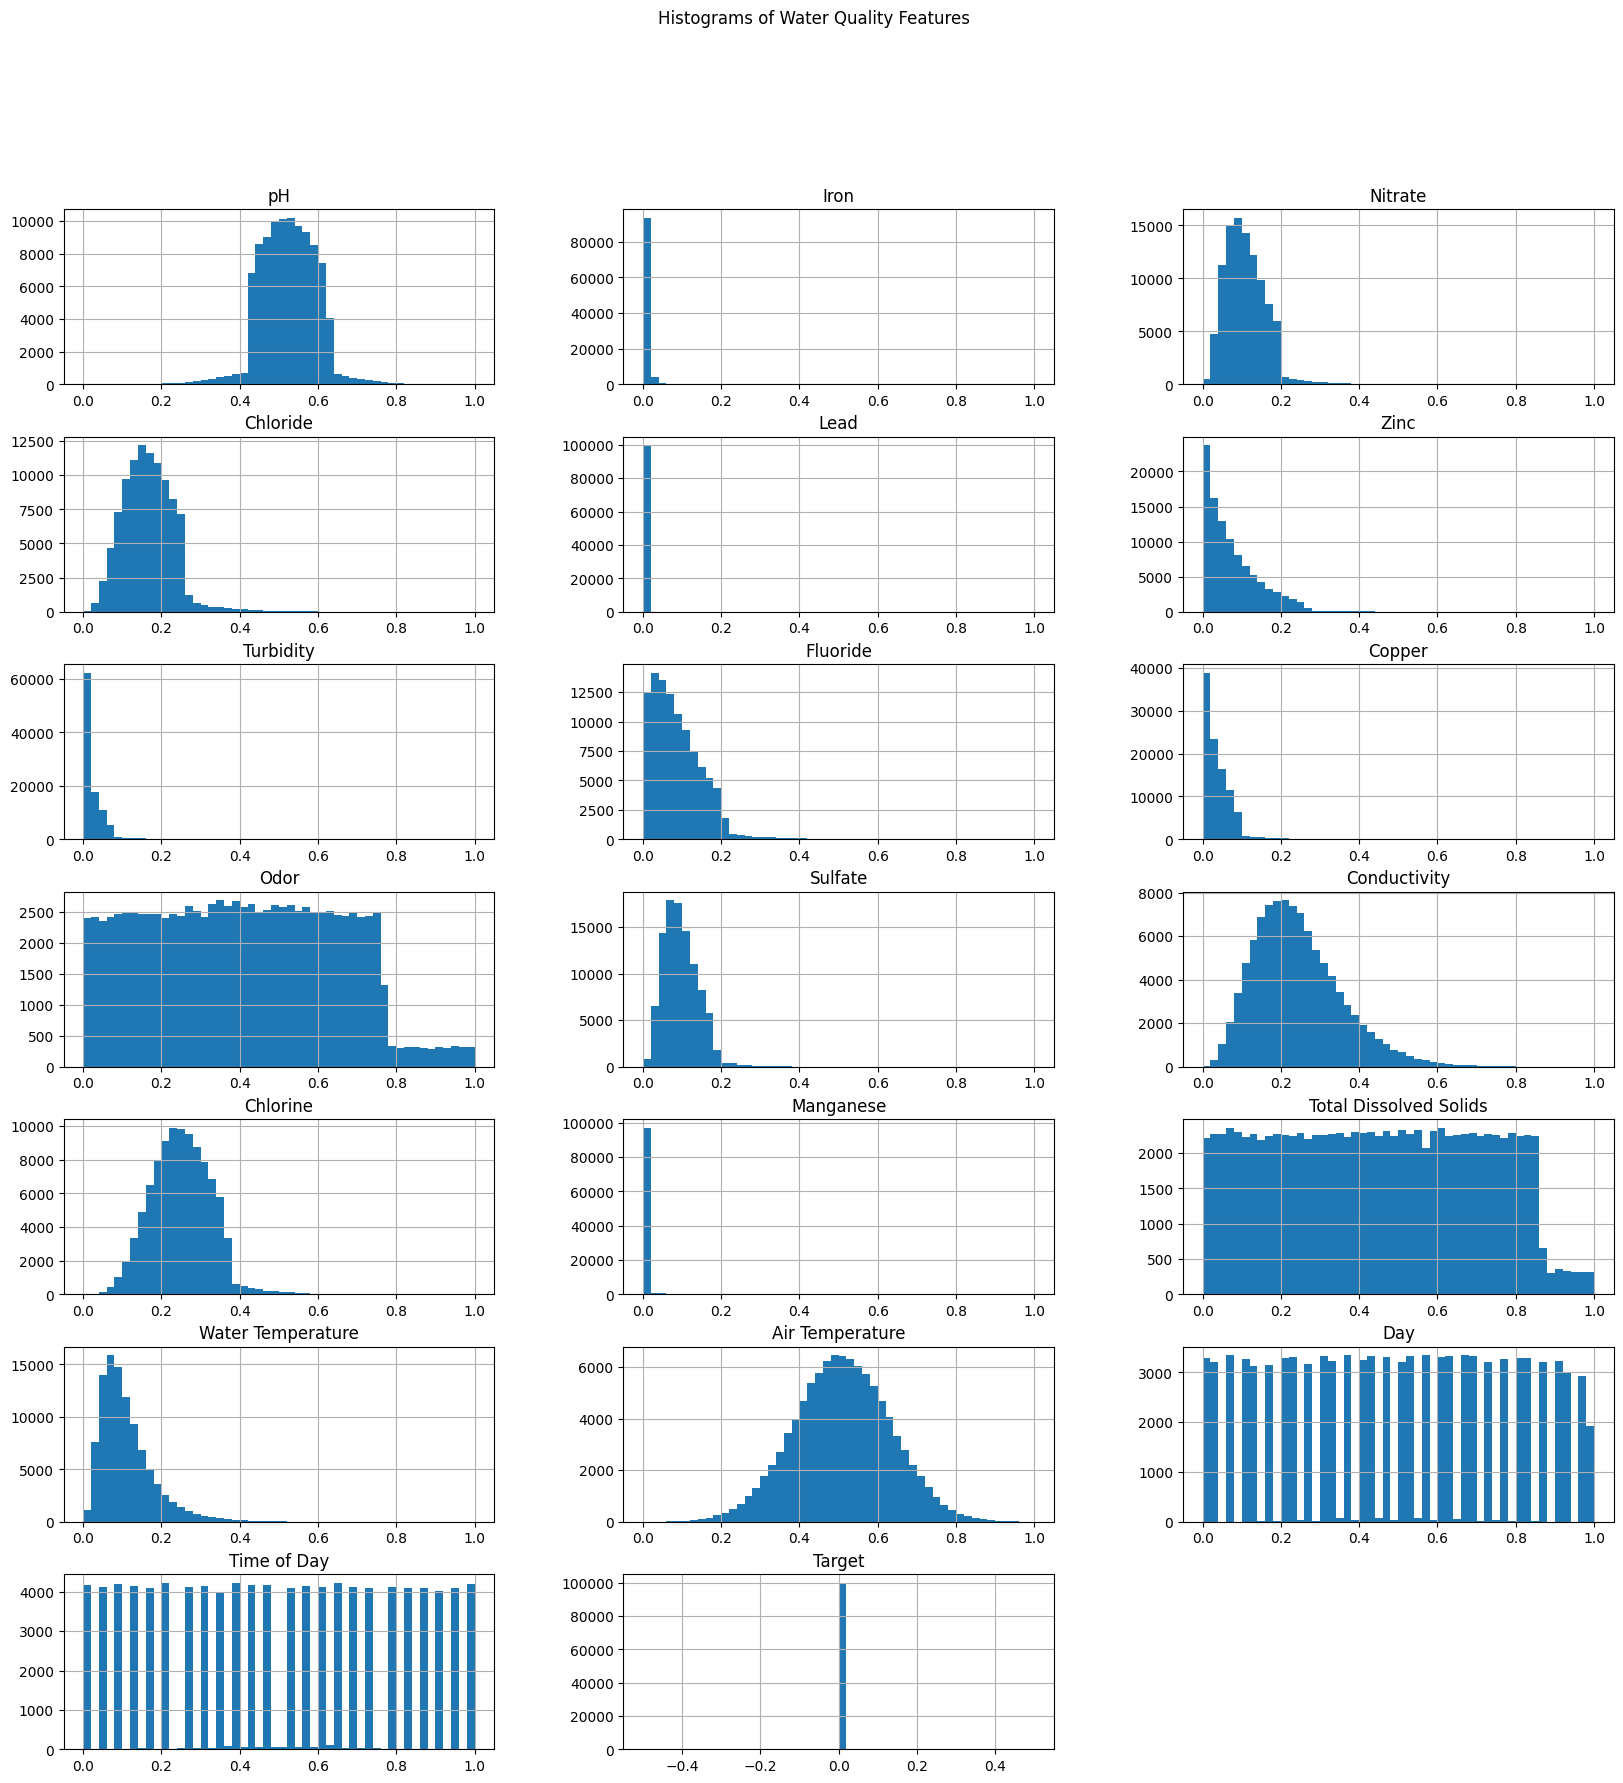

In [ ]:
# Histograms for all features to understand the data distributions
# First identify numerical columns, then exclude encoded Boolean columns for categorical data
numerical_columns = Cleaned_data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
Cleaned_data[numerical_columns].hist(bins=50, figsize=(20, 20), layout=(int(len(numerical_columns)/3)+1, 3))
plt.suptitle('Histograms of Water Quality Features')
plt.show()

In [ ]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
# corr = Cleaned_data.corr() # data frame correlation function
# print(corr)

In [ ]:
# make the heatmap larger in size
# plt.figure(figsize = (50,50))

# ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 16})
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=18)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=18)
# plt.title('Correlation Heatmap', fontsize=28)
# plt.show()

In [ ]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe excluding boolean data columns
boolean_columns = Cleaned_data.select_dtypes(include='bool').columns
Cleaned_data_nobool = Cleaned_data.drop(columns=boolean_columns)
corr2 = Cleaned_data_nobool.corr()

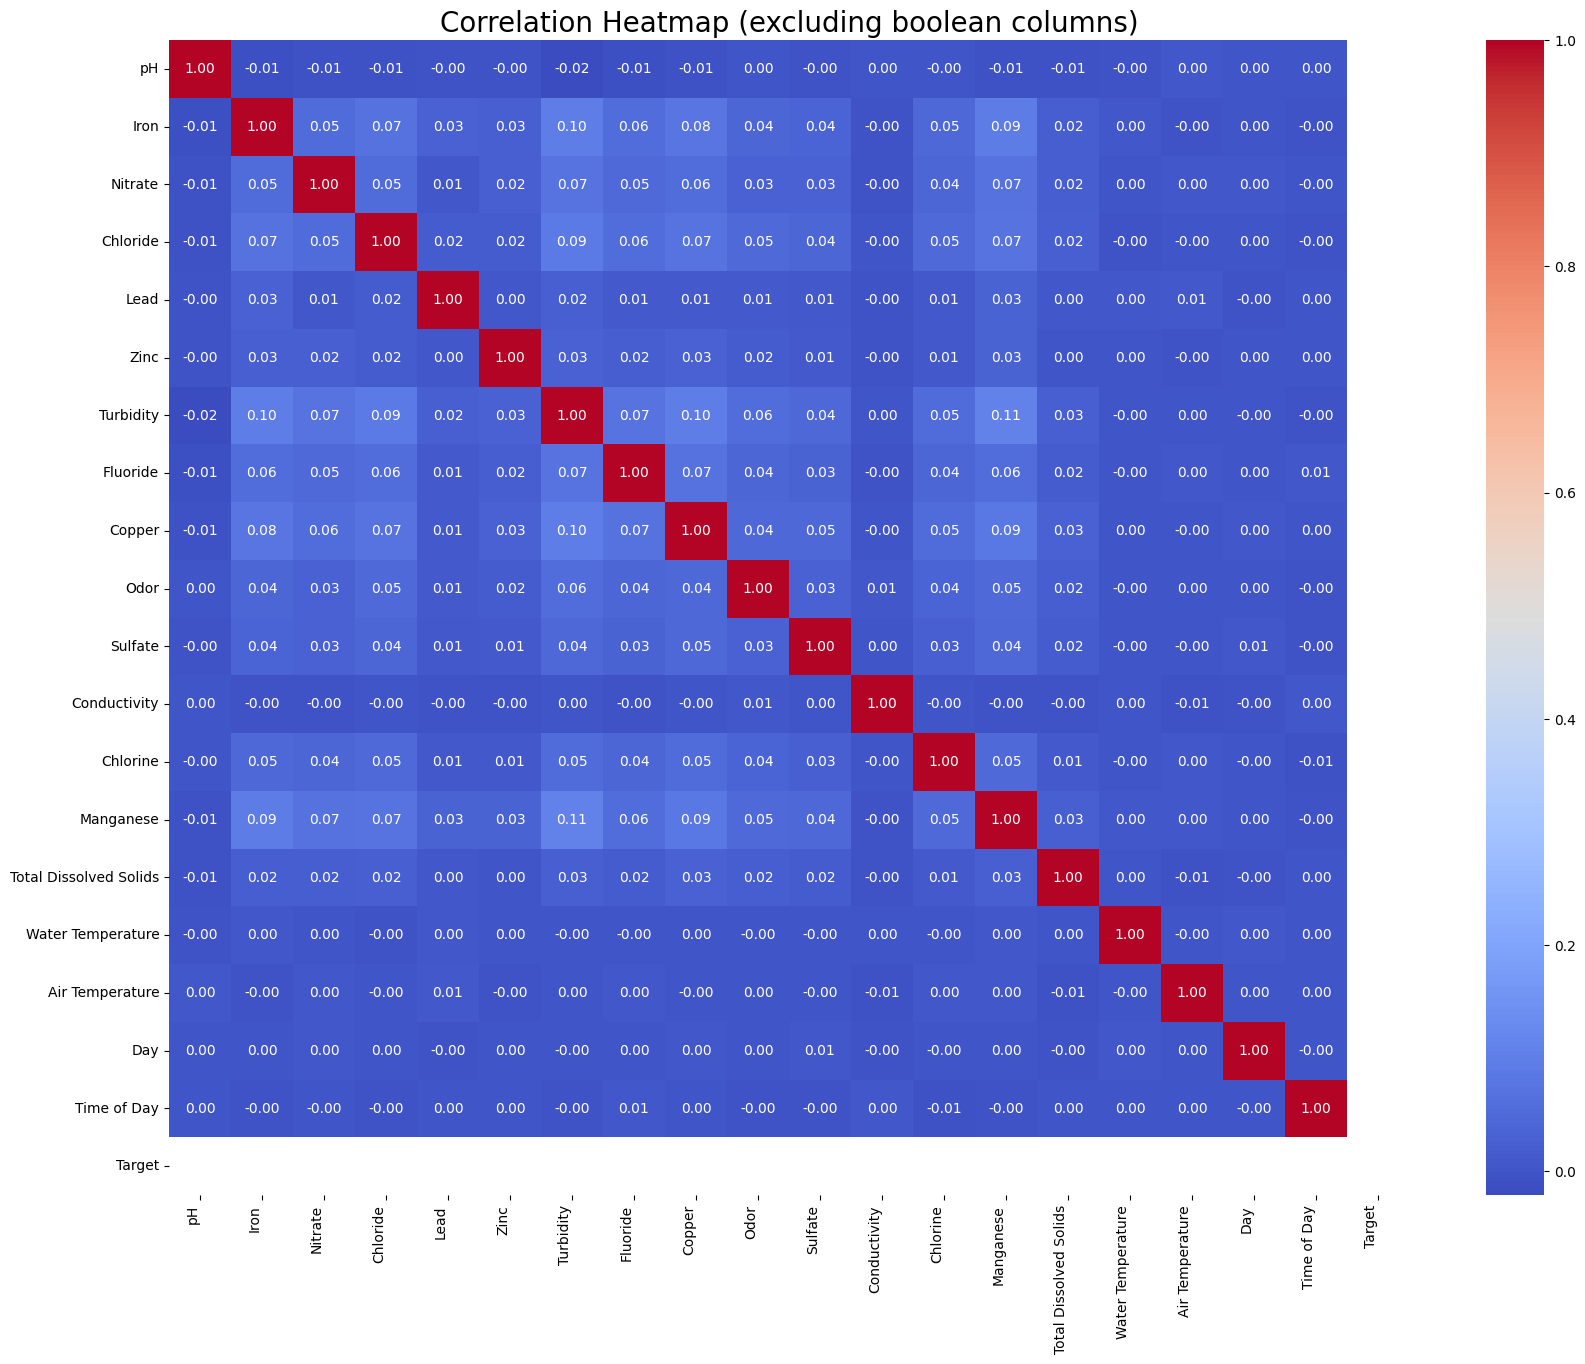

In [ ]:
plt.figure(figsize = (20,15))

ax = sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Correlation Heatmap (excluding boolean columns)', fontsize=20)
plt.show()

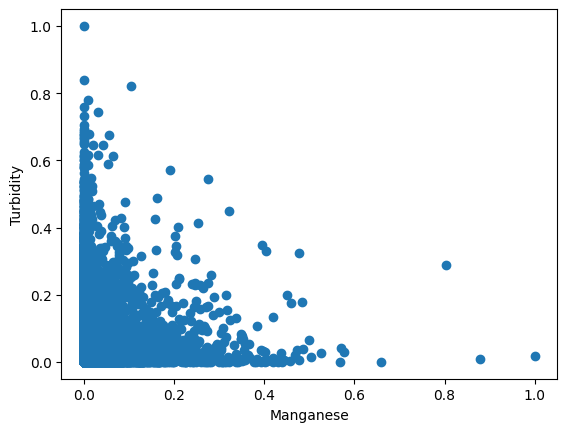

In [ ]:
# Scatter plot
plt.scatter([Cleaned_data['Manganese']], [Cleaned_data['Turbidity']])
plt.xlabel('Manganese')
plt.ylabel('Turbidity')
plt.show()

## Step 3: Identify Trends or Anomalies in the Data

1. **Trend Analysis:**
   - Look for patterns or trends over time or other categorical dimensions.

2. **Anomaly Detection:**
   - Identify any anomalies or unusual observations in the dataset.

In [ ]:
# write your code

## Explanation:
1. Descriptive Statistics: Use describe() method to generate summary statistics for each feature.
2. Histograms: Use hist() method to visualize the distribution of numerical features.
3. Box Plots: Use boxplot() function to visualize outliers and understand the distribution of numerical features.
4. Scatter Plots: Use pairplot() function from Seaborn to examine relationships between pairs of numerical features.
5. Correlation Matrix and Heatmap: Use corr() method and heatmap() function from Seaborn to visualize the correlation between numerical features.
6. Count Plots: Use countplot() function from Seaborn to visualize the frequency of categorical features.
7. Trend Analysis: Group data by month and plot average water temperature over time to identify trends.
8. Anomaly Detection: Use box plots to identify outliers in numerical features.
9. Ensure to replace 'your_data.csv' with the actual file path of your dataset. These visualizations and analyses will help you understand the distributions, relationships, and potential anomalies in your data.


# **Task 3. Feature Engineering** (OPTIONAL - Increase the quality of the dataset)
    


## Step 1: Create New Features

1. **Interaction Terms:**
   - Create new features by multiplying or combining existing features to capture interactions between them.

2. **Aggregate Features:**
   - Create aggregate features such as mean, median, sum, or count of other features.


In [ ]:
# write your code

## Step 2: Evaluate the Importance of Different Features for Predicting Water Quality

1. **Feature Importance Using Tree-Based Models:**
   - Use tree-based models like Random Forest to evaluate the importance of different features.

2. **Correlation with Target:**
   - Calculate the correlation of each feature with the target variable to evaluate their importance.

In [ ]:
# write your code

# Explanation:
1. **Interaction Terms**: Create new features by combining existing features to capture interactions (e.g., pH_Iron, Nitrate_Chloride).
2. **Aggregate Features**: Create new aggregate features such as Total_Metals and Mean_Metals by summing or averaging relevant columns.
3. **Feature Importance Using Tree-Based Models**: Use a Random Forest model to evaluate the importance of each feature.
4. **Correlation with Target**: Calculate the correlation of each feature with the target variable to understand their individual impact on the prediction.


# **Task 4. Model Building**
## Step 1: Split the Data into Training and Testing Sets
   - Use a function to split the dataset into training and testing sets.


In [ ]:
# write your code

## Step 2: Train Machine Learning Models to Predict the Target Variable

1. **Train Models:**
   - Train different machine learning models such as Logistic Regression, Random Forest, and Support Vector Machine.

In [ ]:
# write your code

## Step 3: Evaluate Model Performance Using Appropriate Metrics

1. **Evaluate Models:**
   - Evaluate the performance of the models using metrics like accuracy, precision, recall, and F1-score.

In [ ]:
# write your code

# **Task 5. Model Interpretation and Insights**


## Step 1: Interpret the Model to Understand Which Factors Most Influence Water Quality
1. **Feature Importance:**
   - Use the feature importance scores from tree-based models like Random Forest to identify which factors most influence water quality.
   - Use coefficients from Logistic Regression to understand the direction and magnitude of influence.

## Step 2: Provide Actionable Insights Based on Model Findings

1. **Identify Key Factors:**
   - Determine the most important factors influencing water quality based on the model interpretation.

2. **Actionable Insights:**
   - Provide specific recommendations for addressing key factors to improve water quality.

## Step 3: Discuss Potential Interventions or Policy Recommendations to Improve Water Quality

1. **Interventions:**
   - Suggest practical measures that can be taken to address the key factors influencing water quality.

2. **Policy Recommendations:**
   - Propose policy changes or initiatives to support the interventions and improve water quality on a broader scale.


## Explanation:
1. **Feature Importance**: Identify important features using Random Forest and Logistic Regression models.
2. **Actionable Insights**: Provide recommendations based on the most influential factors.
3. **Interventions and Policy Recommendations**: Suggest practical measures and policy changes to improve water quality.